### purpose

create a 4x4 conceptual figure that shows a scatter plot between offset and fitness for seed 1231422. The 4x4 is evaluation level (rows - ind or pop) and input data (columns - AF or geno)

In [1]:
from pythonimports import *
import myfigs as mf

import runtime_API as rt
import MVP_summary_functions as mvp
import MVP_01_train_gradient_forests as mvp01
import MVP_03_validate_gradient_forests as mvp03
import MVP_06_validate_RONA as mvp06

import seaborn as sns
from scipy.stats import kendalltau

plt.rcParams.update({'font.family' : 'serif'})

figdir =  makedir(f'{rt.resdir}/figures/07_conceptual')

t0 = dt.now()  # notebook timer

rt.latest_commit()
session_info.show()

#########################################################
Today:	July 01, 2024 - 22:05:00 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 6a767410e7b569adbf9df526de108f22ef50aad8  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Wed Mar 6 13:42:13 2024 -0700

Current commit of MVP_offsets:
commit 5ce82f4d655645237a0f4026fa32e220226dc373  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Thu May 16 13:02:58 2024 -0400

Current commit of MVP_runtime:
commit df87dd2c708ac0fdeebcfaaca239473ca2c487af  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Tue Mar 19 16:17:46 2024 -0400
#########################################################



# get data

### get popdata for seed 1231422 (SS-Mtn landscape)

In [2]:
seed = '1231422'

subset, locations, envdata = mvp06.get_pop_data(mvp.slimdir, seed)

fitness_mat = {
    'ind' : mvp03.load_ind_fitness_matrix(mvp.slimdir, seed, subset),
    'pooled' : mvp06.load_pooled_fitness_matrix(mvp.slimdir, seed)
}

samppop = dict(zip(subset['indID'], subset['subpopID']))


Reading in info for subsampled individuals ...


In [3]:
# for figures later on
elevation = sorted(uni(envdata['sal_opt']))
sizes = [0, 1, 2, 3, 4]

temp = envdata.temp_opt.sort_values().unique().tolist()

In [4]:
# create a temp colormap
coolwarm = sns.color_palette("coolwarm", n_colors=10)  # for pnas map colorbar

pop_coolwarm = []  # plotting populations as in pnas
for pop, temp_opt in envdata['temp_opt'].items():
    pop_coolwarm.append(
        coolwarm[temp.index(temp_opt)]
    )
    
coolwarm

[(0.3383765114431373, 0.45281860883137254, 0.8793170768784313),
 (0.4570464785254902, 0.5940055499294118, 0.963029229690196),
 (0.5814861481882353, 0.7134505955294117, 0.9983143529411764),
 (0.7087196897176471, 0.8057213889294117, 0.9811168090470588),
 (0.8180564934117647, 0.8555896775450981, 0.9146376165490196),
 (0.9094595977529412, 0.8393864797647058, 0.8003313524235294),
 (0.9616447383764706, 0.7580291825411765, 0.6617823791647058),
 (0.963806056435294, 0.6341884145294118, 0.5137208491529413),
 (0.9182816725843137, 0.48417347218039214, 0.37779392507058823),
 (0.8301865219490197, 0.30473276355294115, 0.25489142806666665)]

### get performance data

In [5]:
# get AF_pop and geno_ind peformance
results = rt.load_results(ignore_20k=True)

results.index = results.seed_garden + "_" + results.num_loci.astype(str)

results.head()

removing records for models using 20k loci
ind shape = (162000, 17)
pooled shape = (162000, 17)
Function `load_results` completed after : 0-00:00:34


,garden,score,final_LA,glevel,plevel,pleio,slevel,landscape,popsize,migration,simulation_level,rep,num_loci,seed,demography,source,offset_level,seed_garden,final_la_bin
1231109_1_500,1,-0.561309,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_1,0.42 < LA ≤ 0.58
1231109_2_500,2,-0.621278,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_2,0.42 < LA ≤ 0.58
1231109_3_500,3,-0.681061,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_3,0.42 < LA ≤ 0.58
1231109_4_500,4,-0.728768,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_4,0.42 < LA ≤ 0.58
1231109_5_500,5,-0.755431,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_5,0.42 < LA ≤ 0.58


In [6]:
# load geno_pop performance
# created in 03_calculate_ind-averaged_performance/00_calc_ind-averaged_performance
f = f'{rt.resdir}/figures/00_show_individual_averaging/ind-averaged_results.txt'

geno_pop = pd.read_table(f, sep='\t')  # index is offset_level column

geno_pop = geno_pop[geno_pop.num_loci != 20000]

geno_pop.index = geno_pop[['seed', 'garden', 'num_loci']].apply(lambda x: '_'.join(x.astype(str)), axis=1)

geno_pop

,garden,score,seed,num_loci,rep,final_LA,glevel,plevel,pleio,slevel,landscape,popsize,migration,simulation_level,offset_level,source
1231109_1_500,1,-0.688081,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,ind-avg
1231109_2_500,2,-0.746263,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,ind-avg
1231109_3_500,3,-0.806061,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,ind-avg
1231109_4_500,4,-0.865455,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,ind-avg
1231109_5_500,5,-0.909899,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,ind-avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231768_96_10000,96,-0.413000,1231768,10000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,ind-avg
1231768_97_10000,97,-0.399193,1231768,10000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,ind-avg
1231768_98_10000,98,-0.313507,1231768,10000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,ind-avg
1231768_99_10000,99,-0.343152,1231768,10000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,ind-avg


In [7]:
# load af_ind performance
# created in 06_calc_af_ind/06_af_ind_performance.ipynb
f = f'{rt.resdir}/figures/06_af_ind_performance/af_ind_results.txt'

af_ind = pd.read_table(f, sep='\t')

af_ind = af_ind[af_ind.num_loci != 20000]

af_ind.index = af_ind[['seed', 'garden', 'num_loci']].apply(lambda x: '_'.join(x.astype(str)), axis=1)

af_ind

,garden,score,seed,num_loci,rep,final_LA,glevel,plevel,pleio,slevel,landscape,popsize,migration,simulation_level,offset_level,source
1231109_1_500,1,-0.551398,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,"af,ind"
1231109_2_500,2,-0.611882,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,"af,ind"
1231109_3_500,3,-0.673033,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,"af,ind"
1231109_4_500,4,-0.723169,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,"af,ind"
1231109_5_500,5,-0.753114,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,"af,ind"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231768_96_10000,96,-0.265571,1231768,10000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,"af,ind"
1231768_97_10000,97,-0.203994,1231768,10000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,"af,ind"
1231768_98_10000,98,-0.222894,1231768,10000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,"af,ind"
1231768_99_10000,99,-0.267244,1231768,10000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,"af,ind"


In [8]:
results.head()

,garden,score,final_LA,glevel,plevel,pleio,slevel,landscape,popsize,migration,simulation_level,rep,num_loci,seed,demography,source,offset_level,seed_garden,final_la_bin
1231109_1_500,1,-0.561309,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_1,0.42 < LA ≤ 0.58
1231109_2_500,2,-0.621278,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_2,0.42 < LA ≤ 0.58
1231109_3_500,3,-0.681061,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_3,0.42 < LA ≤ 0.58
1231109_4_500,4,-0.728768,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_4,0.42 < LA ≤ 0.58
1231109_5_500,5,-0.755431,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_5,0.42 < LA ≤ 0.58


In [9]:
# combine
all_results = {
    'pooled' : results[results.source == 'pooled'].copy(),
    'ind' : results[results.source == 'ind'].copy(),
    'ind-avg' : geno_pop,
    'af-ind' : af_ind
}

### get offset predictions

In [10]:
# from 05_supplement/03_all_compare_workflows.ipynb
def get_avg_offsets(seed, ind_offset):
    """Average offset predicted across individuals for each population.
    
    Notes
    -----
    - modified from 06_run_time_project/03_calculate_ind-averaged_performance/00_calc_ind-averaged_performance.ipynb
    - I didn't save the ind_avg offsets in original notebook, i need them for scatter plots
    - this basically modified to skip performance calc and combines functions from 06.03.00
    """
    from pythonimports import keys
    import pandas as pd
    import numpy as np
    
    # get individual and population info
    subset = mvp01.read_ind_data(mvp.slimdir, seed)
    subset.subpopID = subset.subpopID.astype(str)
    subset.indID = subset.indID.astype(str)  # to match columns in offset df

    # map individual IDs to population IDs - key = popID value = list of indIDs
    popsamps = subset.groupby('subpopID')['indID'].apply(list).to_dict()

    # for each pop average the offset across the pop's individuals
    avg_offsets = []
    for pop, samps in popsamps.items():
        pop_offset = ind_offset[samps].copy()

        # average offset of individuals (colums) to each of the common gardens (rows)
        offset_series = pop_offset.apply(np.mean, axis=1)
        offset_series.name = pop

        avg_offsets.append(
            offset_series
        )

    # combine pop-level averages and sort columns
    avg_offsets = pd.concat(avg_offsets, axis=1)[map(str, sorted([int(pop) for pop in keys(popsamps)]))]

    return avg_offsets


# get offset 
offsets = wrap_defaultdict(dict, 3)
for source in ['ind', 'pooled']:
    for num_loci in results.num_loci.astype(str).unique():

        repdir = f'/work/lotterhos/brandon/{source}_runtimes/run_20220919_225-450/{num_loci.zfill(5)}'
        
        offset_pkl = f'{repdir}/gradient_forests/validation/offset_dfs/{seed}_offset_dfs.pkl'
        
        offsets[num_loci][source] = pklload(offset_pkl)[source]['all']
        
        if source == 'ind':  # af_ind will use `pooled` offset predictions
            offsets[num_loci]['ind-avg'] = get_avg_offsets(seed, offsets[num_loci][source])
            
    
offsets[num_loci][source]


Reading in info for subsampled individuals ...

Reading in info for subsampled individuals ...

Reading in info for subsampled individuals ...


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,0.000000,0.005344,0.015480,0.027373,0.041163,0.041163,0.027373,0.015480,0.005344,0.000000,0.006912,0.008737,0.016953,0.028232,0.041740,0.041740,0.028232,0.016953,0.008737,0.006912,0.017206,0.018017,0.023145,0.032332,0.044615,0.044615,0.032332,0.023145,0.018017,0.017206,0.032433,0.032870,0.035937,0.042440,0.052405,0.052405,0.042440,0.035937,0.032870,0.032433,0.049650,0.049937,0.052007,0.056695,0.064494,0.064494,0.056695,0.052007,0.049937,0.049650,0.065462,0.065680,0.067268,0.070955,0.077329,0.077329,0.070955,0.067268,0.065680,0.065462,0.081164,0.081340,0.082627,0.085655,0.091006,0.091006,0.085655,0.082627,0.081340,0.081164,0.094170,0.094322,0.095434,0.098068,0.102774,0.102774,0.098068,0.095434,0.094322,0.094170,0.103917,0.104054,0.105063,0.107461,0.111772,0.111772,0.107461,0.105063,0.104054,0.103917,0.117757,0.117878,0.118770,0.120896,0.124744,0.124744,0.120896,0.118770,0.117878,0.117757
2,0.005344,0.000000,0.010136,0.022029,0.035820,0.035820,0.022029,0.010136,0.000000,0.005344,0.008737,0.006912,0.012268,0.023088,0.036480,0.036480,0.023088,0.012268,0.006912,0.008737,0.018017,0.017206,0.019970,0.027952,0.039738,0.039738,0.027952,0.019970,0.017206,0.018017,0.032870,0.032433,0.033980,0.039207,0.048321,0.048321,0.039207,0.033980,0.032433,0.032870,0.049937,0.049650,0.050674,0.054317,0.061222,0.061222,0.054317,0.050674,0.049650,0.049937,0.065680,0.065462,0.066243,0.069070,0.074622,0.074622,0.069070,0.066243,0.065462,0.065680,0.081340,0.081164,0.081794,0.084100,0.088717,0.088717,0.084100,0.081794,0.081164,0.081340,0.094322,0.094170,0.094714,0.096713,0.100753,0.100753,0.096713,0.094714,0.094170,0.094322,0.104054,0.103917,0.104410,0.106226,0.109917,0.109917,0.106226,0.104410,0.103917,0.104054,0.117878,0.117757,0.118192,0.119799,0.123084,0.123084,0.119799,0.118192,0.117757,0.117878
3,0.015480,0.010136,0.000000,0.011893,0.025684,0.025684,0.011893,0.000000,0.010136,0.015480,0.016953,0.012268,0.006912,0.013755,0.026597,0.026597,0.013755,0.006912,0.012268,0.016953,0.023145,0.019970,0.017206,0.020916,0.030914,0.030914,0.020916,0.017206,0.019970,0.023145,0.035937,0.033980,0.032433,0.034544,0.041371,0.041371,0.034544,0.032433,0.033980,0.035937,0.052007,0.050674,0.049650,0.051054,0.055899,0.055899,0.051054,0.049650,0.050674,0.052007,0.067268,0.066243,0.065462,0.066534,0.070321,0.070321,0.066534,0.065462,0.066243,0.067268,0.082627,0.081794,0.081164,0.082031,0.085131,0.085131,0.082031,0.081164,0.081794,0.082627,0.095434,0.094714,0.094170,0.094918,0.097610,0.097610,0.094918,0.094170,0.094714,0.095434,0.105063,0.104410,0.103917,0.104595,0.107043,0.107043,0.104595,0.103917,0.104410,0.105063,0.118770,0.118192,0.117757,0.118356,0.120525,0.120525,0.118356,0.117757,0.118192,0.118770
4,0.027373,0.022029,0.011893,0.000000,0.013791,0.013791,0.000000,0.011893,0.022029,0.027373,0.028232,0.023088,0.013755,0.006912,0.015426,0.015426,0.006912,0.013755,0.023088,0.028232,0.032332,0.027952,0.020916,0.017206,0.022051,0.022051,0.017206,0.020916,0.027952,0.032332,0.042440,0.039207,0.034544,0.032433,0.035243,0.035243,0.032433,0.034544,0.039207,0.042440,0.056695,0.054317,0.051054,0.049650,0.051529,0.051529,0.049650,0.051054,0.054317,0.056695,0.070955,0.069070,0.066534,0.065462,0.066899,0.066899,0.065462,0.066534,0.069070,0.070955,0.085655,0.084100,0.082031,0.081164,0.082327,0.082327,0.081164,0.082031,0.084100,0.085655,0.098068,0.096713,0.094918,0.094170,0.095175,0.095175,0.094170,0.094918,0.096713,0.098068,0.107461,0.106226,0.104595,0.103917,0.104828,0.104828,0.103917,0.104595,0.106226,0.107461,0.120896,0.119799,0.118356,0.117757,0.118561,0.118561,0.117757,0.118356,0.119799,0.120896
5,0.041163,0.035820,0.025684,0.013791,0.000000,0.000000,0.013791,0.025684,0.035820,0.041163,0.04174

# make a figure

In [11]:
# from 06_calc_af_ind/06_af_ind_performance.ipynb
def create_af_ind_offset(df, popsamps):
    """For an pop-level offset dataframe (100 rows x 100 cols), make it 100 rows x 1000 cols.
    
    Parameters
    ----------
    df : pandas.DataFrame
        - 100 rows (transplant locations) and 100 columns (genetic source)
        - entries are from allele frequency models (AF, pop)
        
    popsamps : dict
        - key = pop, value = list of sample names
        
    Notes
    -----
    - it is better to iterate samples within pops, because not all pops have equal sample size
        and therefore I cannot just duplicate population values 10x each (100 pop x 10 = 1000 inds)
    """
    import pandas as pd
    from collections import defaultdict

    assert df.shape == (100, 100)

    new_df = defaultdict(dict)
    for pop, samps in popsamps.items():
        for samp in samps:  # replicate the population-level offset for each individual
            new_df[samp] = df[pop]

    new_df = pd.DataFrame(new_df)

    return new_df

In [12]:
rt.factor_names['ind-avg']

'$\\it{GO}_{geno, pop}$'

100%|███████████████| 100/100 [00:00<00:00, 445.92it/s]


Saved to:  /work/lotterhos/brandon/runtime/figures/07_conceptual/conceptual_fig.pdf


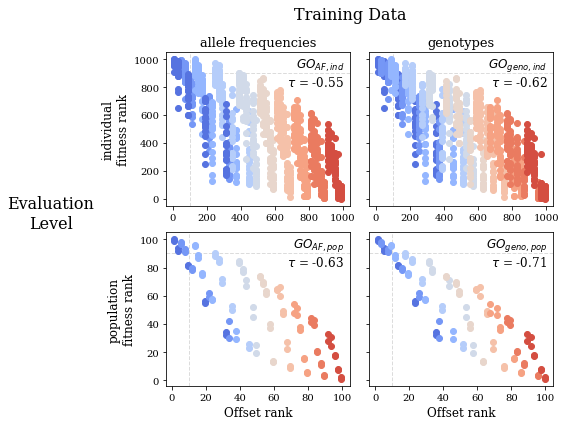

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 6), sharey='row')

data_keys = {
    'af-ind' : ('pooled', 'ind'),
    'ind' : ('ind', 'ind'),
    'pooled' : ('pooled', 'pooled'),
    'ind-avg' : ('ind-avg', 'pooled'),
}

i = 0
for source, (offset_key, fitness_key) in data_keys.items():
    ax = axes.flat[i]
    
    offset = offsets[num_loci][offset_key].copy()
    fitness = fitness_mat[fitness_key].copy()

    if source == 'af-ind':
        # repeat the offset scores to match number of ind fitness values
#         offset = offset[offset.columns.tolist() * 10]  # DONT DO THIS - SEE NOTE IN create_af_ind_offset
        offset = create_af_ind_offset(
            offset,
            popsamps=subset.astype({'subpopID' : str}).groupby('subpopID')['indID'].apply(list).to_dict()
        )
        fitness.columns = fitness.columns.astype(int)#.map(samppop).astype(str)

    assert offset.shape == fitness.shape, (source, offset.shape, fitness.shape)

    assert round(all_results[source].loc[f'{seed}_1_{num_loci}'].score, 2) == \
            round(offset.loc[1].corr(fitness.loc[1], method='kendall'), 2)

    for j, ind_or_pop in enumerate(pbar(offset.columns.unique())):
        # get colors for scatter points
        if ncol(offset) == 1000:
            color = pop_coolwarm[samppop[int(ind_or_pop)] - 1]
            temp, env2 = subset.loc[str(ind_or_pop), ['temp_opt', 'sal_opt']]
        else:
            color = pop_coolwarm[j]
            temp, env2 = envdata.loc[int(ind_or_pop), ['temp_opt', 'sal_opt']]

#         # plot true values
#         ax.scatter(
#             offset.loc[1, ind_or_pop],
#             fitness.loc[1, ind_or_pop],
#             color=color
#         )
        # plot rank
        ax.scatter(
            x=offset.loc[1].rank(ascending=True).loc[ind_or_pop],
            y=fitness.loc[1].rank(ascending=True).loc[ind_or_pop],
            color=color
        )
    

    if fitness_key == 'ind':
        eval_level = 'individual'
    else:
        eval_level = 'population'
#     print(source, eval_level)
    
    if offset_key == 'ind':
        training_data = 'genotypes'
    else:
        training_data = 'allele frequencies'
#     print(fitness_key, training_data)
        
    if i in [0, 1]:
        ax.set_title(training_data, fontsize=13)
    if i in [0, 2]:
        ax.set_ylabel(f'{eval_level}\nfitness rank', fontsize=12)
        # set eval level
#         ax.text(x=-0.4, y=0.5, s=eval_level, va='center', rotation=90, transform=ax.transAxes, fontsize=13)
    if i in [2, 3]:
        ax.set_xlabel('Offset rank', fontsize=12)
        
#     ax.set_title(rt.factor_names[source])
    stat = round(offset.loc[1].corr(fitness.loc[1], method='kendall'), 2)
    ax.text(x=0.97, y=0.78, s=f"{rt.factor_names[source]}\n$\\tau$ = {stat}",
            ha='right', transform=ax.transAxes, fontsize=12)
    
#     ax.axvline(offset.loc[1].quantile(0.10), **rt.hline_kwargs)
#     ax.axhline(fitness.loc[1].quantile(0.10), **rt.hline_kwargs)
    if fitness_key != 'ind':
        ax.axvline(10, **rt.hline_kwargs)
        ax.axhline(90, **rt.hline_kwargs)
    else:
        ax.axvline(100, **rt.hline_kwargs)
        ax.axhline(900, **rt.hline_kwargs)
        
#     ax.set_ylim(
#         len(offset.columns) * 1.1,
#         0 - len(offset.columns) * 0.1
#     )  # invert y-axis so highest offset is higher

    i += 1

fig.suptitle('Training Data', fontsize=16, ha='center', x=0.62)
fig.supylabel('Evaluation\nLevel', fontsize=16, ha='center', rotation=0, x=0.1)

plt.tight_layout()

mf.save_pdf(f'{figdir}/conceptual_fig.pdf')

In [14]:
formatclock(dt.now() - t0)

'0-00:01:25'